In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('train_data.csv')
df_val = pd.read_csv('valid_data.csv')


In [3]:
df

,Unnamed: 0,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,0,4.0,0,26.0,NaN,25.0,12.0,NaN,6017.76,NaN,...,15.0,0.0,0.0,NaN,NaN,0.0,12.111597,0.000,NaN,0
1,1,2.0,0,101.0,NaN,31.0,NaN,0.654416,NaN,360000.0,...,26.0,0.0,0.0,0.942823,257.0,0.0,13.230096,68881.260,36.0,0
2,2,11.0,0,46.0,NaN,22.0,NaN,0.608811,NaN,73384.0,...,2.0,3.0,0.0,0.789278,17.0,0.0,11.422727,7353.900,NaN,0
3,3,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
4,4,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55707,55707,7.0,0,41.0,22.0,25.0,37.0,NaN,11162.00,NaN,...,19.0,0.0,0.0,NaN,NaN,0.0,11.920868,NaN,NaN,0
55708,55708,12.0,0,55.0,9.0,28.0,44.0,NaN,41118.00,NaN,...,17.0,0.0,0.0,NaN,NaN,4882.0,11.276203,NaN,0.0,1
55709,55709,9.0,0,95.0,33.0,32.0,NaN,NaN,NaN,NaN,...,62.0,0.0,0.0,NaN,15.0,15896.0,12.390766,12478.000,8.0,1
55710,55710,17.0,0,114.0,6.0,39.0,NaN,NaN,NaN,200000.0,...,0.0,1.0,0.0,0.000000,23.0,60390.0,12.740195,922.315,NaN,0


In [4]:
df.describe()

,Unnamed: 0,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
count,55712.000000,54275.000000,55712.000000,55259.000000,23777.000000,55712.000000,19307.000000,36437.000000,3.303600e+04,3.820700e+04,...,51112.000000,55260.000000,55254.000000,38207.000000,43463.000000,54310.000000,16911.000000,5.128700e+04,43092.000000,55712.000000
mean,27855.500000,12.090392,0.135824,75.889520,18.675064,34.386326,26.837054,0.721308,4.908516e+04,7.590147e+05,...,15.077125,2.835993,1.123919,0.778214,78.835768,4914.701897,12.961345,4.163461e+04,20.004897,0.187195
std,16082.813435,12.974924,0.342604,110.292805,15.371279,9.609283,18.222779,0.220594,1.671543e+05,9.094260e+05,...,26.510788,4.094233,2.214252,0.272560,85.511028,12527.493882,0.838236,5.798415e+04,19.505226,0.390071
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000006,0.000000e+00,1.000000e+00,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.166784,0.000000e+00,0.000000,0.000000
25%,13927.750000,3.000000,0.000000,46.000000,7.000000,27.000000,13.000000,0.597431,9.904000e+03,2.000000e+05,...,1.000000,0.000000,0.000000,0.667182,23.000000,0.000000,12.430451,1.745494e+04,8.000000,0.000000
50%,27855.500000,8.000000,0.000000,71.000000,14.000000,33.000000,23.000000,0.767137,2.544739e+04,5.250000e+05,...,5.000000,2.000000,0.000000,0.879608,53.000000,1.000000,13.033576,3.237733e+04,14.000000,0.000000
75%,41783.250000,17.000000,0.000000,102.000000,27.000000,40.000000,39.000000,0.896207,5.631332e+04,9.667733e+05,...,16.000000,4.000000,1.000000,0.984520,104.000000,382.000000,13.519280,5.410904e+04,26.000000,0.000000
max,55711.000000,138.000000,1.000000,24158.000000,154.000000,89.000000,145.000000,1.969946,2.045004e+07,2.122999e+07,...,667.000000,89.000000,42.000000,8.059675,1589.000000,119128.000000,19.641366,4.953765e+06,244.000000,1.000000


In [5]:
df.head()

,Unnamed: 0,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,0,4.0,0,26.0,NaN,25.0,12.0,NaN,6017.76,NaN,...,15.0,0.0,0.0,NaN,NaN,0.0,12.111597,0.00,NaN,0
1,1,2.0,0,101.0,NaN,31.0,NaN,0.654416,NaN,360000.0,...,26.0,0.0,0.0,0.942823,257.0,0.0,13.230096,68881.26,36.0,0
2,2,11.0,0,46.0,NaN,22.0,NaN,0.608811,NaN,73384.0,...,2.0,3.0,0.0,0.789278,17.0,0.0,11.422727,7353.90,NaN,0
3,3,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.40,9.0,0
4,4,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.40,9.0,0


In [6]:
df.isnull().sum()

Unnamed: 0                                      0
days_90_queries                              1437
flag_zpexp                                      0
ageolddate_f7                                 453
f41_my                                      31935
age2                                            0
f39_my                                      36405
active_crd_amount_to_limit                  19275
sumlastvalue_7_f50                          22676
avg_active_credit_limit                     17505
total_amount                                 3461
amount_of_last_term_contr                    8546
avgcontractlife                              7265
sm_plus_3_months_rt                         13807
ageoldexsdate_f5                             1759
total_crd_cnt                                 452
gender                                        453
inst_crd_cnt                                11750
avg_active_amount                           12250
max_overdue_cr_card                          1402


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55712 entries, 0 to 55711
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                55712 non-null  int64  
 1   days_90_queries                           54275 non-null  float64
 2   flag_zpexp                                55712 non-null  int64  
 3   ageolddate_f7                             55259 non-null  float64
 4   f41_my                                    23777 non-null  float64
 5   age2                                      55712 non-null  float64
 6   f39_my                                    19307 non-null  float64
 7   active_crd_amount_to_limit                36437 non-null  float64
 8   sumlastvalue_7_f50                        33036 non-null  float64
 9   avg_active_credit_limit                   38207 non-null  float64
 10  total_amount                      

In [8]:
df.notnull().sum()

Unnamed: 0                                  55712
days_90_queries                             54275
flag_zpexp                                  55712
ageolddate_f7                               55259
f41_my                                      23777
age2                                        55712
f39_my                                      19307
active_crd_amount_to_limit                  36437
sumlastvalue_7_f50                          33036
avg_active_credit_limit                     38207
total_amount                                52251
amount_of_last_term_contr                   47166
avgcontractlife                             48447
sm_plus_3_months_rt                         41905
ageoldexsdate_f5                            53953
total_crd_cnt                               55260
gender                                      55259
inst_crd_cnt                                43962
avg_active_amount                           43462
max_overdue_cr_card                         54310


In [9]:
df.shape

(55712, 38)

In [10]:
df.dtypes

Unnamed: 0                                    int64
days_90_queries                             float64
flag_zpexp                                    int64
ageolddate_f7                               float64
f41_my                                      float64
age2                                        float64
f39_my                                      float64
active_crd_amount_to_limit                  float64
sumlastvalue_7_f50                          float64
avg_active_credit_limit                     float64
total_amount                                float64
amount_of_last_term_contr                   float64
avgcontractlife                             float64
sm_plus_3_months_rt                         float64
ageoldexsdate_f5                            float64
total_crd_cnt                               float64
gender                                      float64
inst_crd_cnt                                float64
avg_active_amount                           float64
max_overdue_

In [11]:
mean_days = df['days_90_queries'].mean()

In [12]:
df['days_90_queries'] = df['days_90_queries'].fillna(mean_days)

In [13]:
df.isnull().sum()

Unnamed: 0                                      0
days_90_queries                                 0
flag_zpexp                                      0
ageolddate_f7                                 453
f41_my                                      31935
age2                                            0
f39_my                                      36405
active_crd_amount_to_limit                  19275
sumlastvalue_7_f50                          22676
avg_active_credit_limit                     17505
total_amount                                 3461
amount_of_last_term_contr                    8546
avgcontractlife                              7265
sm_plus_3_months_rt                         13807
ageoldexsdate_f5                             1759
total_crd_cnt                                 452
gender                                        453
inst_crd_cnt                                11750
avg_active_amount                           12250
max_overdue_cr_card                          1402


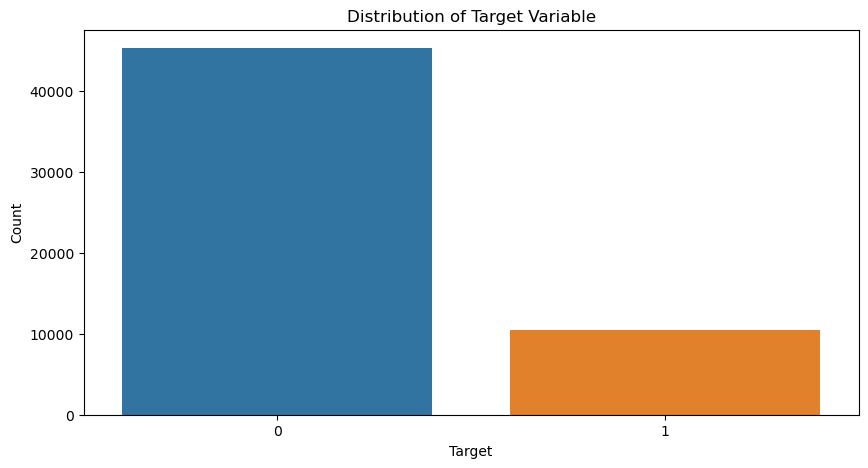

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

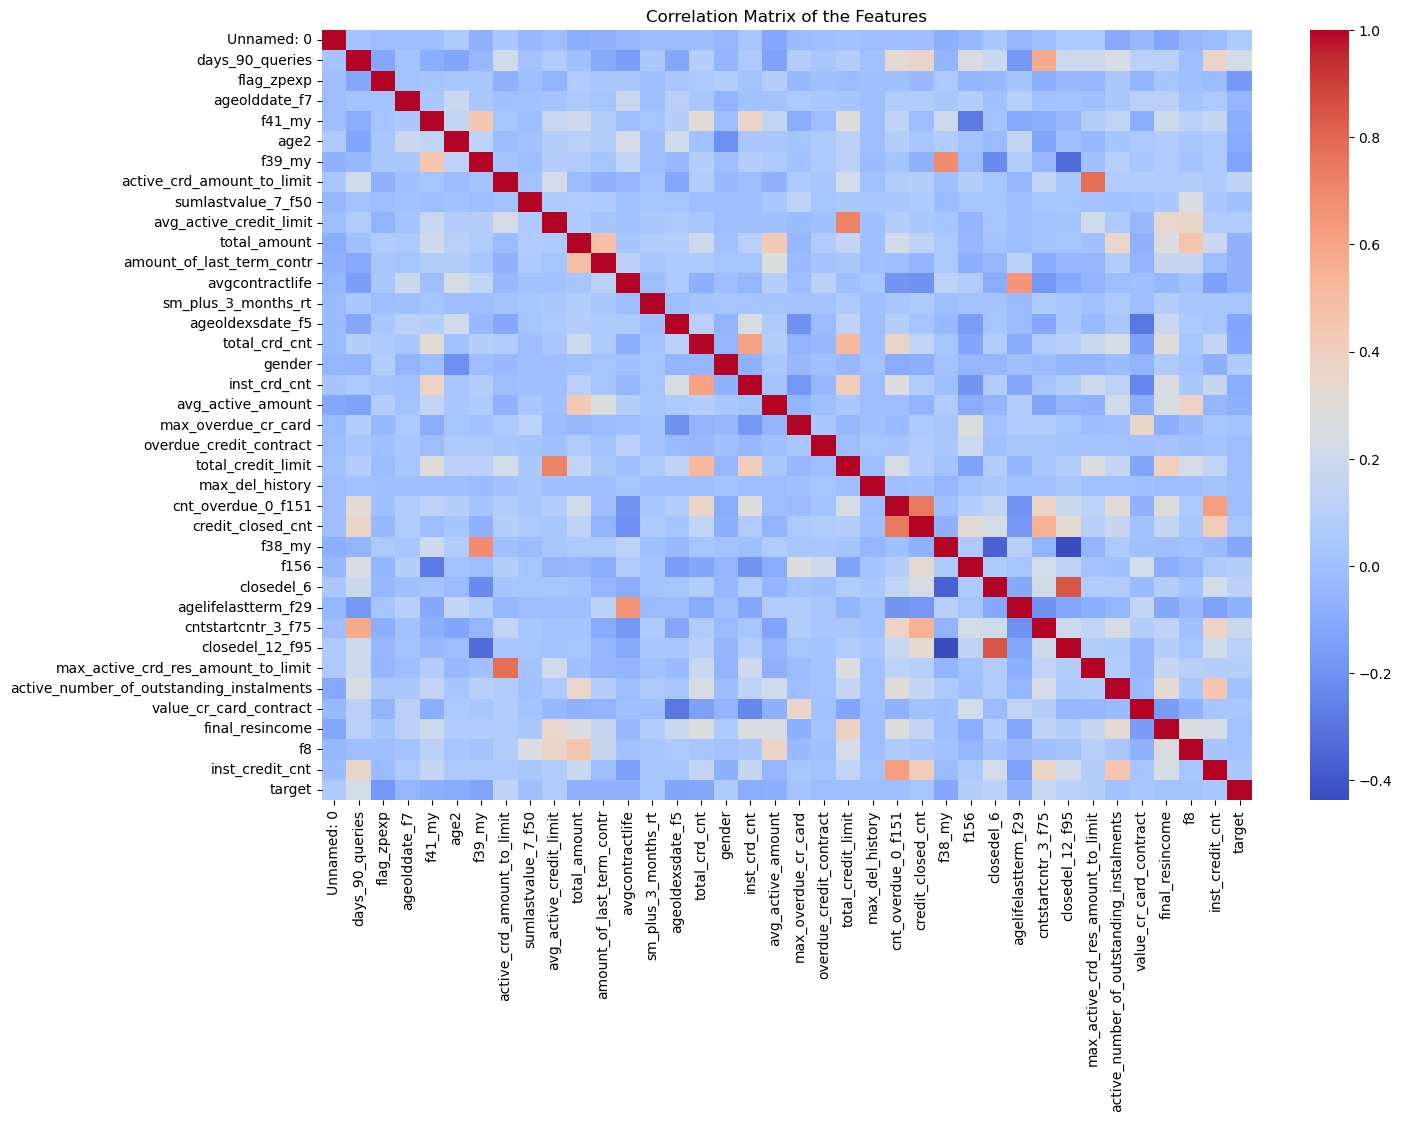

In [15]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of the Features')
plt.show()


In [16]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
df_val[numerical_cols] = imputer.transform(df_val[numerical_cols])

In [17]:
df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df_val['gender'] = df_val['gender'].map({'male': 1, 'female': 0})

In [18]:
X_train = df.drop(columns=['target'])
y_train = df['target']
X_valid = df_val.drop(columns=['target'], errors='ignore')
y_valid = df_val['target']

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [20]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}


Model: Decision Tree
average accuracy of cross validation: 0.6145
Accuracy on validation sample: 0.8192
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     12169
         1.0       0.24      0.37      0.29      1351

    accuracy                           0.82     13520
   macro avg       0.58      0.62      0.59     13520
weighted avg       0.86      0.82      0.84     13520



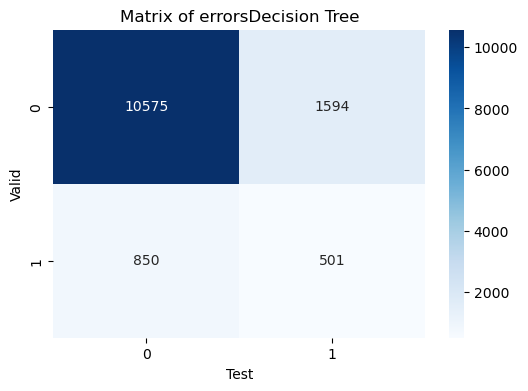

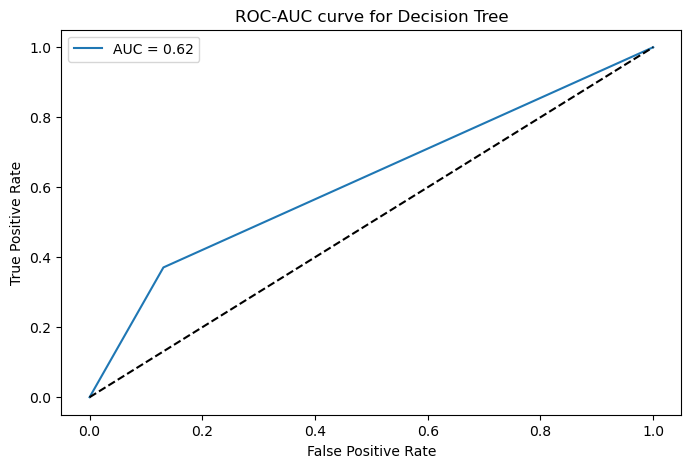


Model: Random Forest
average accuracy of cross validation: 0.6902
Accuracy on validation sample: 0.9050
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     12169
         1.0       0.61      0.14      0.23      1351

    accuracy                           0.91     13520
   macro avg       0.76      0.57      0.59     13520
weighted avg       0.88      0.91      0.88     13520



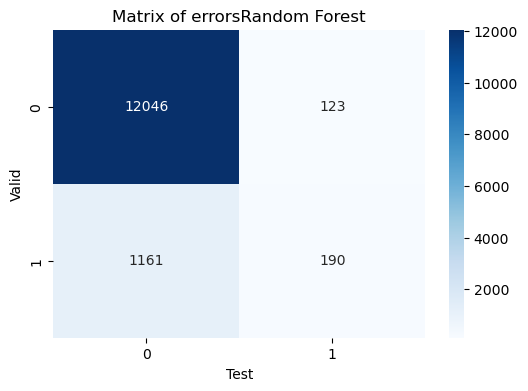

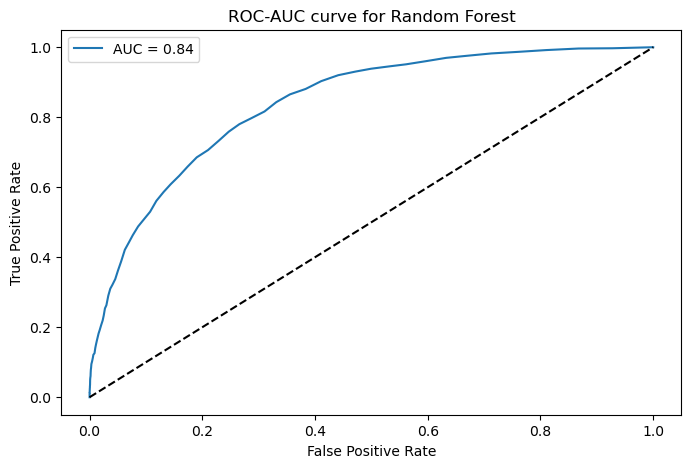


Model: Gradient Boosting
average accuracy of cross validation: 0.5892
Accuracy on validation sample: 0.8982
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     12169
         1.0       0.44      0.07      0.12      1351

    accuracy                           0.90     13520
   macro avg       0.67      0.53      0.54     13520
weighted avg       0.86      0.90      0.86     13520



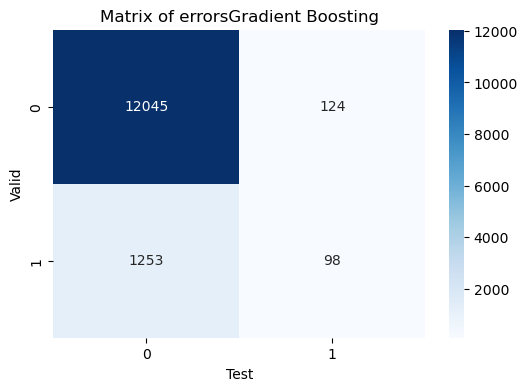

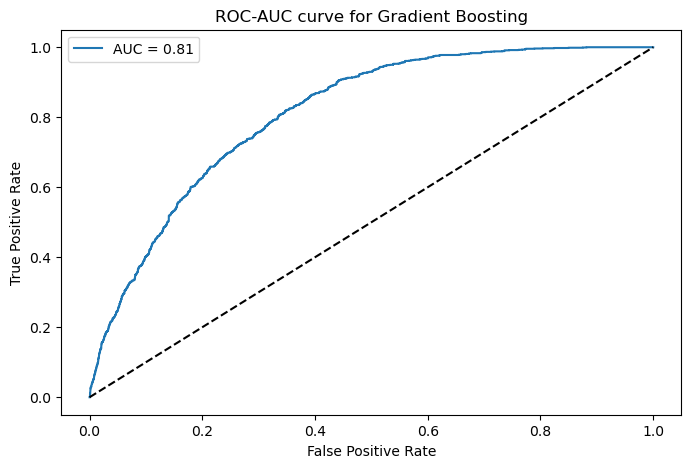


Model: Logistic Regression
average accuracy of cross validation: 0.8146
Accuracy on validation sample: 0.8947
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     12169
         1.0       0.40      0.10      0.16      1351

    accuracy                           0.89     13520
   macro avg       0.65      0.54      0.55     13520
weighted avg       0.86      0.89      0.87     13520



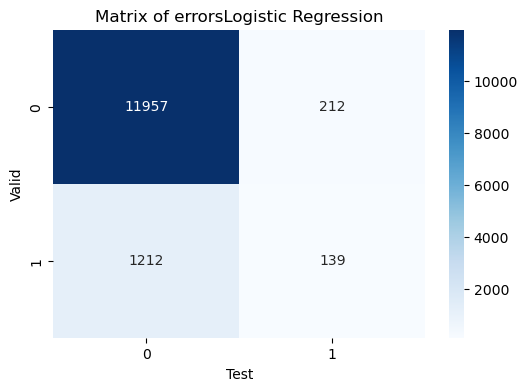

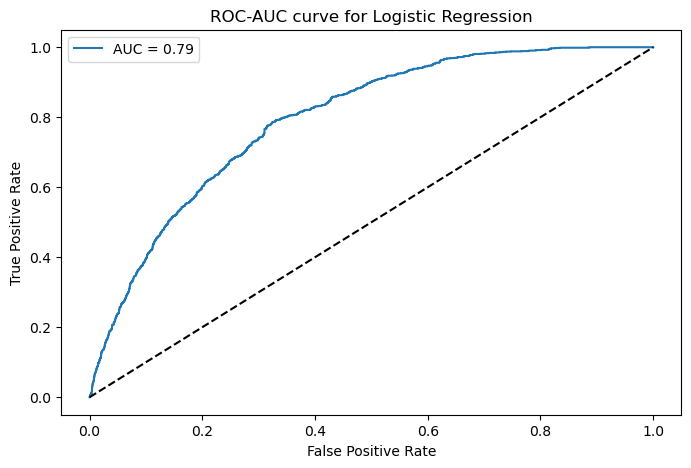

In [22]:
if np.isnan(X_train_scaled).any() or np.isnan(X_valid_scaled).any():
    X_train_scaled = np.nan_to_num(X_train_scaled)
    X_valid_scaled = np.nan_to_num(X_valid_scaled)
    
for name, model in models.items():
    try:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        print(f"\nModel: {name}")
        print(f"average accuracy of cross validation: {cv_scores.mean():.4f}")

        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_valid_scaled)
        print(f"Accuracy on validation sample: {accuracy_score(y_valid, y_pred):.4f}")
        print(classification_report(y_valid, y_pred))

    except ValueError as e:
        print(f"error {name}: {e}")

    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrix of errors{name}')
    plt.xlabel('Test')
    plt.ylabel('Valid')
    plt.show()

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_valid_scaled)[:, 1]
        auc_score = roc_auc_score(y_valid, y_prob)
        fpr, tpr, _ = roc_curve(y_valid, y_prob)
        plt.figure(figsize=(8, 5))
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC-AUC curve for {name}')
        plt.legend()
        plt.show()

